# Application of matrix decomposition to biological data

So far, we've used PCA and ICA on not truly biological datasets, now we'll try a real biological dataset by obtaining the data from a public database.

## Shalek2013 data

In [44]:
# Alphabetical order is standard
# We're doing "import superlongname as abbrev" for our laziness - this way we don't have to type out the whole thing each time.

# Python plotting library
import matplotlib.pyplot as plt

# Numerical python library (pronounced "num-pie")
import numpy as np

# Dataframes in Python
import pandas as pd

# T-test of independent samples
from scipy.stats import ttest_ind

# Statistical plotting library we'll use
import seaborn as sns
sns.set(style='whitegrid')

# Matrix decomposition
from sklearn.decomposition import PCA, FastICA

# Manifold learning
from sklearn.manifold import MDS, TSNE

# This is necessary to show the plotted figures inside the notebook -- "inline" with the notebook cells
%matplotlib inline

# Read the data table
shalek2013_metadata = pd.read_csv('../data/shalek2013/metadata.csv', 
                               
                                     # Sets the first (Python starts counting from 0 not 1) column as the row names
                                      index_col=0)
shalek2013_metadata.head()

,phenotype,pooled,outlier,maturity
S1,BDMC,False,False,immature
S2,BDMC,False,False,immature
S3,BDMC,False,False,immature
S4,BDMC,False,False,immature
S5,BDMC,False,False,immature


In [16]:
shalek2013_expression = pd.read_csv('../data/shalek2013/expression.csv', 
                               
                                     # Sets the first (Python starts counting from 0 not 1) column as the row names
                                      index_col=0)
shalek2013_expression.head()

,NPL,QK,AK163153,PARK2,AGPAT4,IGF2R,MRPL18,TCP1,RNASEL,ACAT2,...,MIR692-1,RSPH3B,TAGAP1,RNASET2A,RPS6KA2,DHX9,RNASET2B,FGFR1OP,BRP44L,SFT2D1
S1,4.290577,5.038477,1.249363,0.540694,0.095072,2.648209,5.476280,5.711141,0.065396,4.138114,...,4.165290,0.705881,0.000000,4.700306,0.033376,0.573596,3.199527,0.000000,6.134085,3.699883
S2,0.000000,4.183371,1.947622,0.500426,5.868557,0.000000,0.000000,1.072934,0.000000,5.346876,...,3.646853,3.288222,0.000000,0.000000,1.061873,0.312905,1.060520,0.000000,6.715250,1.786313
S3,4.860293,3.847854,1.082463,0.604097,4.137252,3.350293,4.428491,4.795181,0.120361,0.184545,...,2.179880,2.155733,0.055715,0.313902,3.044962,0.223030,0.272703,0.154241,6.911104,0.000000
S4,0.090829,0.066797,1.119633,0.418703,0.066015,0.287966,5.351368,5.050281,0.099992,0.153751,...,3.476627,1.325198,4.680847,2.846205,3.190581,0.303179,0.000000,0.634990,7.116205,0.123292
S5,0.000000,3.305915,1.267464,0.000000,0.000000,0.000000,5.644345,5.809713,0.000000,3.807793,...,3.598966,0.505812,2.457638,1.172225,0.000000,0.038511,0.000000,4.883386,7.387554,4.569395


In [17]:
shalek2013_expression_feature = pd.read_csv('../data/shalek2013/expression_feature.csv', 
                               
                                     # Sets the first (Python starts counting from 0 not 1) column as the row names
                                      index_col=0)
shalek2013_expression_feature.head()

,gene_category
0610007L01RIK,NaN
0610007P14RIK,NaN
0610007P22RIK,NaN
0610008F07RIK,NaN
0610009B22RIK,NaN


In [32]:
smusher = PCA(n_components=4)

# Turn the matrix-decomposed data
smushed = pd.DataFrame(smusher.fit_transform(shalek2013_expression), index=shalek2013_expression.index)
smushed.head()

,0,1,2,3
S1,-47.162601,9.425470,-15.905578,30.728110
S2,28.941488,25.678547,-49.181067,7.955534
S3,8.054771,33.133762,33.695133,16.340005
S4,20.693003,42.692214,17.625862,-11.614830
S5,0.525987,29.102877,18.513061,15.065190


/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


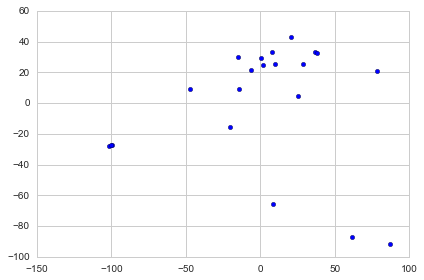

In [19]:
# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()

# Plot the first ("0") and second ("1") components
ax.scatter(smushed[0], smushed[1])

We could plot other components if we felt like it:

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


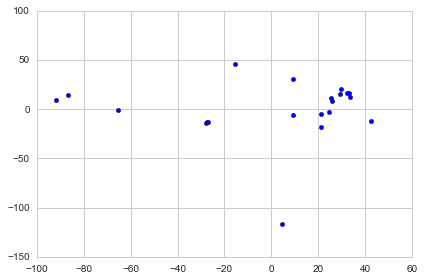

In [33]:
# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()

# Plot the second ("1") and fourth ("3") components
ax.scatter(smushed[1], smushed[3])

Let's use a different color for mature and immature cells using a list comprehension. All [X11 color names](https://en.wikipedia.org/wiki/X11_color_names) are valid here. I also like [this](https://en.wikipedia.org/wiki/Web_colors#X11_color_names) list for looking up color names

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


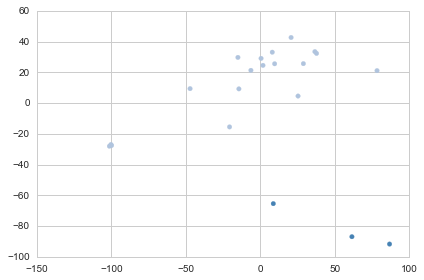

In [21]:
maturity_color = ['lightsteelblue' if x == 'immature' else 'steelblue' for x in shalek2013_metadata['maturity']]

# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()

# Plot the first ("0") and second ("1") components
ax.scatter(smushed[0], smushed[1], color=maturity_color)

Hmm those points way to the left look strange .. is it because they are pooled? Let's add a black outline to the pooled samples. That means we'll have to plot them separately.

In [22]:
singles = shalek2013_metadata.query('pooled == False').index
singles

Index(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11',
       'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18'],
      dtype='object')

In [23]:
pooled = shalek2013_metadata.query('pooled == True').index
pooled

Index(['P1', 'P2', 'P3'], dtype='object')

We'll use `.loc` notation to access the pooled and single rows separately.

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


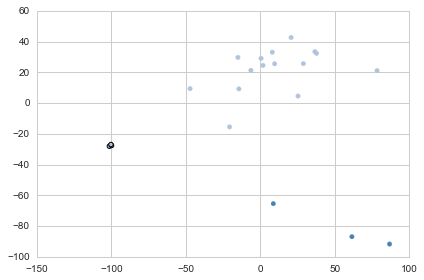

In [29]:
# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()

# Plot the first ("0") and second ("1") components
ax.scatter(smushed.loc[singles, 0], smushed.loc[singles, 1], color=maturity_color)
ax.scatter(smushed.loc[pooled, 0], smushed.loc[pooled, 1], color=maturity_color, edgecolor='black', linewidth=1)

Hmmm it's hard to tell which ones have the outline so lets make the markers bigger with the argument `s=100`. "`s`" is short for "size." The default value is 20.

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


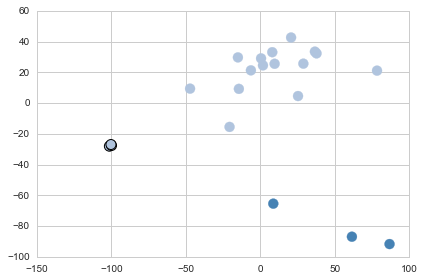

In [35]:
# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()

# Plot the first ("0") and second ("1") components
ax.scatter(smushed.loc[singles, 0], smushed.loc[singles, 1], color=maturity_color, s=100)
ax.scatter(smushed.loc[pooled, 0], smushed.loc[pooled, 1], color=maturity_color, edgecolor='black', linewidth=1, s=100)

Let's add a nice legend too.

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


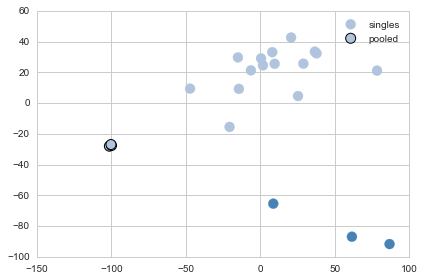

In [58]:
# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()

# Plot the first ("0") and second ("1") components
ax.scatter(smushed.loc[singles, 0], smushed.loc[singles, 1], color=maturity_color, s=100, label='singles')
ax.scatter(smushed.loc[pooled, 0], smushed.loc[pooled, 1], color=maturity_color, 
           edgecolor='black', linewidth=1, s=100, label='pooled')
ax.legend(loc='best')

Oh hmm that only made a legend for the light blue. We'll have to plot the different colors separately. To do that, we'll have to get a subset of the data using just the mature and immature cells.

In [49]:
immature = shalek2013_metadata.query('maturity == "immature"').index
immature

Index(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11',
       'S14', 'S15', 'S17', 'S18', 'P1', 'P2', 'P3'],
      dtype='object')

In [50]:
mature = shalek2013_metadata.query('maturity == "mature"').index
mature

Index(['S12', 'S13', 'S16'], dtype='object')

Now plot the different subsets separately so they have different labels in the legend.

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


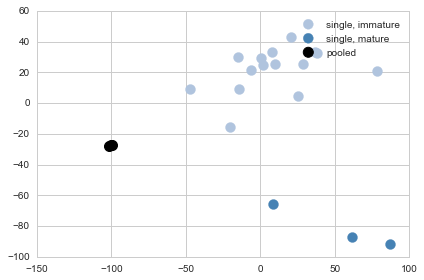

In [60]:
# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()

# Plot the first ("0") and second ("1") components
ax.scatter(smushed.loc[singles & immature, 0], smushed.loc[singles & immature, 1], color='lightsteelblue', 
           s=100, label='single, immature')
ax.scatter(smushed.loc[singles & mature, 0], smushed.loc[singles & mature, 1], color='steelblue', 
           s=100, label='single, mature')
ax.scatter(smushed.loc[pooled, 0], smushed.loc[pooled, 1], color='black', 
           edgecolor='black', linewidth=1, s=100, label='pooled')
ax.legend()

Hmm the legend overlaps with the cells so let's put the legend in the upper left.

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


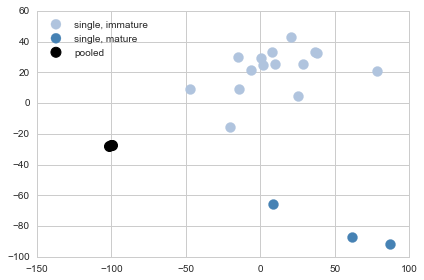

In [61]:
# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()

# Plot the first ("0") and second ("1") components
ax.scatter(smushed.loc[singles & immature, 0], smushed.loc[singles & immature, 1], color='lightsteelblue', 
           s=100, label='single, immature')
ax.scatter(smushed.loc[singles & mature, 0], smushed.loc[singles & mature, 1], color='steelblue', 
           s=100, label='single, mature')
ax.scatter(smushed.loc[pooled, 0], smushed.loc[pooled, 1], color='black', 
           edgecolor='black', linewidth=1, s=100, label='pooled')

# Force legend location to be upper left
ax.legend(loc='upper left')

And label the x and y axes with the percentage explained variance.

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


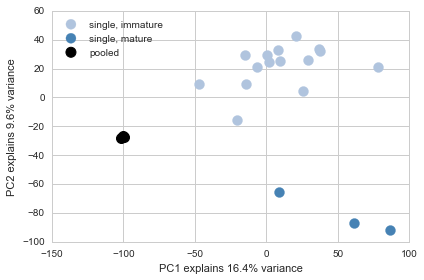

In [62]:
# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()


# Plot the first ("0") and second ("1") components
ax.scatter(smushed.loc[singles & immature, 0], smushed.loc[singles & immature, 1], color='lightsteelblue', 
           s=100, label='single, immature')
ax.scatter(smushed.loc[singles & mature, 0], smushed.loc[singles & mature, 1], color='steelblue', 
           s=100, label='single, mature')
ax.scatter(smushed.loc[pooled, 0], smushed.loc[pooled, 1], color='black', 
           edgecolor='black', linewidth=1, s=100, label='pooled')

xlabel = 'PC1 explains {:.1f}% variance'.format(100*smusher.explained_variance_ratio_[0])
ylabel = 'PC2 explains {:.1f}% variance'.format(100*smusher.explained_variance_ratio_[1])

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Force legend location to be upper left
ax.legend(loc='upper left')

If we like, we can save the figure with `fig.savefig("shalek2013_pca.pdf")`. The format of the file to save is auto-detected

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


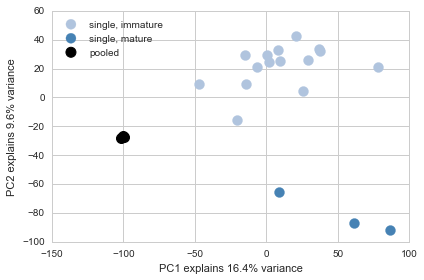

In [63]:
# Initialize a figure with a single subpanel (axes, or ax) to plot on
fig, ax = plt.subplots()


# Plot the first ("0") and second ("1") components
ax.scatter(smushed.loc[singles & immature, 0], smushed.loc[singles & immature, 1], color='lightsteelblue', 
           s=100, label='single, immature')
ax.scatter(smushed.loc[singles & mature, 0], smushed.loc[singles & mature, 1], color='steelblue', 
           s=100, label='single, mature')
ax.scatter(smushed.loc[pooled, 0], smushed.loc[pooled, 1], color='black', 
           edgecolor='black', linewidth=1, s=100, label='pooled')

xlabel = 'PC1 explains {:.1f}% variance'.format(100*smusher.explained_variance_ratio_[0])
ylabel = 'PC2 explains {:.1f}% variance'.format(100*smusher.explained_variance_ratio_[1])

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Force legend location to be upper left
ax.legend(loc='upper left')

fig.savefig('shalek2013_pca.pdf')

### Exercise 1
To do this exercise, you don't have to use the cells above, you can press "+" to add a cell and work in there instead.

1. Try plotting other principal components in the last plot
    1. Do you need to change the x- and y-labels?
2. How does the explained variance ratio compare in the other components?
3. Try plotting only the pooled or single samples
1. Try ICA (`FastICA`), t-SNE (`TSNE`) and MDS (`MDS`)
    1. Compare different numbers of components
    2. Compare different random states: `FastICA(random_state=0)` for example
        1. Does setting the random state not work for any of the "smushers"? Why or why not?

## Macaulay2016 data

In [39]:
macaulay2016_expression = pd.read_csv('../data/macaulay2016/gene_expression_s.csv', index_col=0)
macaulay2016_expression.head()

,DIM_1_C12,DIM_1_H6,DIM_2_A5,HIGH_2_E9,HIGH_1_B12,HIGH_2_C11,HIGH_1_G12,DIM_2_D1,HIGH_1_G1,HIGH_1_H11,...,HIGH_2_E4,HIGH_2_D3,HIGH_1_G11,DIM_2_F4,DIM_1_A5,DIM_1_D12,DIM_2_A1,DIM_2_E12,DIM_2_B8,HIGH_1_A5
0,,,,,,,,,,,,,,,,,,,,,
ENSDARG00000000001,0.0000,0.0000,2.90975,0.0,0.0000,0.0,0.0,107.711,0.0,0.0,...,0.0,1.35273,0.0,0.0000,0.0000,0.000,0.0000,0.00000,0.0,0.000
ENSDARG00000000002,3.7797,0.0000,0.00000,0.0,0.0000,0.0,0.0,0.000,0.0,0.0,...,0.0,0.00000,0.0,0.0000,0.0000,0.000,0.0000,3.52148,0.0,0.000
ENSDARG00000000018,0.0000,31.8751,0.00000,0.0,0.0000,0.0,0.0,0.000,0.0,0.0,...,0.0,0.00000,0.0,99.2972,21.9266,150.873,62.7091,123.49500,0.0,0.000
ENSDARG00000000019,0.0000,0.0000,0.00000,0.0,63.3819,0.0,0.0,0.000,0.0,0.0,...,0.0,0.00000,0.0,46.2471,0.0000,0.000,0.0000,0.00000,0.0,323.772
ENSDARG00000000068,0.0000,0.0000,0.00000,0.0,0.0000,0.0,0.0,0.000,0.0,0.0,...,0.0,0.00000,0.0,0.0000,0.0000,0.000,61.2223,0.00000,0.0,0.000


Notice that there's ERCCs and GFP expression in this matrix as well.

In [41]:
macaulay2016_expression.tail()

,DIM_1_C12,DIM_1_H6,DIM_2_A5,HIGH_2_E9,HIGH_1_B12,HIGH_2_C11,HIGH_1_G12,DIM_2_D1,HIGH_1_G1,HIGH_1_H11,...,HIGH_2_E4,HIGH_2_D3,HIGH_1_G11,DIM_2_F4,DIM_1_A5,DIM_1_D12,DIM_2_A1,DIM_2_E12,DIM_2_B8,HIGH_1_A5
0,,,,,,,,,,,,,,,,,,,,,
ERCC-00165,1452.27,397.319,0.00,299.50,0.0,0.000,0.0,58.2552,0.0,0.0,...,0.0,0.0,81.9581,0.000,0.00,0.000,278.333,0.00,0.00,0.0
ERCC-00168,0.00,0.000,0.00,0.00,0.0,0.000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0000,0.000,0.00,0.000,0.000,0.00,0.00,0.0
ERCC-00170,0.00,0.000,0.00,0.00,0.0,414.477,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0000,0.000,0.00,0.000,0.000,0.00,0.00,0.0
ERCC-00171,11635.40,8308.990,8631.20,22862.60,25139.4,18930.600,23922.8,14070.2000,17092.9,22996.1,...,31726.3,15473.3,18730.1000,2400.750,2178.13,4513.600,3173.240,7163.44,12319.10,23600.6
GFP,2094.91,2560.660,5966.27,9181.56,20293.4,18840.600,13169.2,7633.0100,24326.8,23559.6,...,11461.9,16694.4,17809.2000,468.449,107.13,938.591,0.000,1251.31,7702.64,13459.0


Read metadata

In [65]:
# Set maximum columns to display as 50 because the dataframe has 49 columns
pd.options.display.max_columns = 50

macaulay2016_metadata = pd.read_csv('../data/macaulay2016/sample_info_qc.csv', index_col=0)
# Necessary step for converting the parsed cluster color to be usable with matplotlib
macaulay2016_metadata['cluster_color'] = macaulay2016_metadata['cluster_color'].map(eval)
macaulay2016_metadata.head()

,% Parent,% Total,3'UTR_Exons,488,5'UTR_Exons,561,Average mapped length,CDS_Exons,Cells,ERCC Content,FSC Horizontal,Introns,MT Content,Number of input reads,Number of reads mapped to multiple loci,Pass QC,Population,SSC,TES_down_10kb,TES_down_1kb,TES_down_5kb,TSS_up_10kb,TSS_up_1kb,TSS_up_5kb,Time,Total Assigned Tags,Total Tags,Uniquely mapped reads number,Well.1,batch,cluster,condition,detected_genes,detection_limit,difference_component,genes_above_detection_limit,log_detection_limit,log_total_molecules,lower_tpm_limit,molecule_r2,outlier_component,total_molecules,within_large_component,within_small_component,cluster_color,tsne_0,tsne_1,log_488,log_SSC
Well,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DIM_1_A1,NaN,100.00%,615178,80.0,118167,6.0,229.53,1273306,1.0,116339.14620,26224.0,335710,50283.35600,1851524,102724,True,All Events,99.0,99286,33287,80038,45840,7960,31838,43013.0,2487487,3081852,1061545,A1,DIM_1,2,DIM,3842,282.287896,0.078682,2324,2.450692,6.460057,38.688781,0.849279,-0.119395,2884413.0,0.070390,-0.104144,"(0.55432528607985565, 0.62711267120697922, 0.7...",-0.357368,12.650468,1.903090,1.995635
DIM_1_A10,NaN,100.00%,625664,39.0,99645,1.0,230.31,1032911,1.0,279412.04190,24600.0,208414,25440.23268,1545560,50090,True,All Events,38.0,54736,23336,47098,21880,4641,16359,45699.0,2043250,2347479,830227,A10,DIM_1,3,DIM,1608,282.287896,0.021386,564,2.450692,5.900172,286.543062,0.853730,0.017293,794642.0,0.073285,0.020246,"(0.90311419262605563, 0.54185316071790801, 0.7...",-0.001426,6.763604,1.591065,1.579784
DIM_1_A11,NaN,100.00%,733798,53.0,245374,1.0,230.64,3031565,1.0,24324.44224,28399.0,292668,58967.66400,2400179,97432,True,All Events,161.0,73111,32044,61726,32337,7000,26319,43100.0,4408853,5050040,1608633,A11,DIM_1,2,DIM,5557,282.287896,-0.083068,3566,2.450692,6.978323,19.049522,0.778746,-0.036702,9513110.0,-0.016871,-0.179175,"(0.55432528607985565, 0.62711267120697922, 0.7...",-8.698019,8.706809,1.724276,2.206826
DIM_1_A12,NaN,100.00%,827658,337.0,148061,9.0,230.22,1597099,1.0,186802.23200,25161.0,410537,34740.25240,2200263,88452,True,All Events,117.0,71640,27892,61936,37473,5587,26440,43109.0,3092468,3591024,1247953,A12,DIM_1,2,DIM,2174,282.287896,0.031794,876,2.450692,6.094479,190.479102,0.901161,0.034679,1243023.0,0.045065,-0.065027,"(0.55432528607985565, 0.62711267120697922, 0.7...",-4.495216,11.184408,2.527630,2.068186
DIM_1_A2,NaN,100.00%,187244,83.0,38552,5.0,229.60,322876,1.0,251667.90200,32152.0,95808,40535.44800,752984,22726,True,All Events,78.0,22166,8085,18885,11643,1301,7172,43021.0,678289,806410,282918,A2,DIM_1,3,DIM,1628,564.575793,-0.015701,373,2.751722,5.955462,388.363168,0.817718,0.072677,902531.0,0.074522,0.049654,"(0.90311419262605563, 0.54185316071790801, 0.7...",-1.362267,3.037966,1.919078,1.892095


Filter the gene expression data to use only ensembl genes (no ERCCs or GFP), only use cells that passed QC, and recalculate transcripts per million without the ERCCS.

In [76]:
ensembl_genes = [x for x in macaulay2016_expression.index if x.startswith('ENS')]
cells_pass_qc = macaulay2016_metadata["Pass QC"].index[macaulay2016_metadata["Pass QC"]]

macaulay2016_expression_filtered = macaulay2016_expression.loc[ensembl_genes, cells_pass_qc]

# Recalculate TPM
macaulay2016_expression_filtered = 1e6 * macaulay2016_expression_filtered / macaulay2016_expression_filtered.sum()

# Transpose so it's machine learning format
macaulay2016_expression_filtered = macaulay2016_expression_filtered.T

# Take only "expressed genes" with expression greater than 1 in at least 3 cells
mask = (macaulay2016_expression_filtered > 1).sum() >= 3
macaulay2016_expression_filtered = macaulay2016_expression_filtered.loc[:, mask]
print(macaulay2016_expression_filtered.shape)
macaulay2016_expression_filtered.head()

(363, 20672)


0,ENSDARG00000000001,ENSDARG00000000002,ENSDARG00000000018,ENSDARG00000000019,ENSDARG00000000068,ENSDARG00000000069,ENSDARG00000000086,ENSDARG00000000102,ENSDARG00000000103,ENSDARG00000000142,ENSDARG00000000151,ENSDARG00000000161,ENSDARG00000000175,ENSDARG00000000183,ENSDARG00000000189,ENSDARG00000000212,ENSDARG00000000229,ENSDARG00000000241,ENSDARG00000000324,ENSDARG00000000370,ENSDARG00000000380,ENSDARG00000000384,ENSDARG00000000394,ENSDARG00000000423,ENSDARG00000000442,...,ENSDARG00000097930,ENSDARG00000097934,ENSDARG00000097937,ENSDARG00000097940,ENSDARG00000097941,ENSDARG00000097952,ENSDARG00000097961,ENSDARG00000097964,ENSDARG00000097975,ENSDARG00000097979,ENSDARG00000097986,ENSDARG00000097988,ENSDARG00000097993,ENSDARG00000097997,ENSDARG00000098004,ENSDARG00000098012,ENSDARG00000098017,ENSDARG00000098019,ENSDARG00000098021,ENSDARG00000098024,ENSDARG00000098027,ENSDARG00000098029,ENSDARG00000098031,ENSDARG00000098032,ENSDARG00000098040
Well,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DIM_1_A1,0.000000,0.0,69.794966,121.938273,0.0,110.117342,0.000000,0.0,4.260440,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,27.812558,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,6.051196e-10,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,25.760546,0.0,0.0,0.0,0.000000,20.587129
DIM_1_A10,0.000000,0.0,82.169400,0.000000,0.0,292.959919,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
DIM_1_A11,0.000000,0.0,49.121973,0.000000,0.0,47.051288,14.999343,0.0,1.641284,0.0,0.0,0.0,0.0,0.0,0.973743,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,141.917762,0.0,0.0,...,0.389908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.126514e-38,0.0,0.000000e+00,0.0,0.0,0.0,0.0,76.176289,0.0,0.0,45.600784,0.0,0.0,0.0,5.537606,2.147987
DIM_1_A12,134.441793,0.0,0.000000,65.203040,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,151.014304,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
DIM_1_A2,0.000000,0.0,302.703018,0.000000,0.0,143.614039,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,158.727572,367.793878,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,1.174333e-09,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


Add 1 and take the log2

In [77]:
macaulay2016_expression_log2 = np.log2(macaulay2016_expression_filtered + 1)
macaulay2016_expression_log2.head()

0,ENSDARG00000000001,ENSDARG00000000002,ENSDARG00000000018,ENSDARG00000000019,ENSDARG00000000068,ENSDARG00000000069,ENSDARG00000000086,ENSDARG00000000102,ENSDARG00000000103,ENSDARG00000000142,ENSDARG00000000151,ENSDARG00000000161,ENSDARG00000000175,ENSDARG00000000183,ENSDARG00000000189,ENSDARG00000000212,ENSDARG00000000229,ENSDARG00000000241,ENSDARG00000000324,ENSDARG00000000370,ENSDARG00000000380,ENSDARG00000000384,ENSDARG00000000394,ENSDARG00000000423,ENSDARG00000000442,...,ENSDARG00000097930,ENSDARG00000097934,ENSDARG00000097937,ENSDARG00000097940,ENSDARG00000097941,ENSDARG00000097952,ENSDARG00000097961,ENSDARG00000097964,ENSDARG00000097975,ENSDARG00000097979,ENSDARG00000097986,ENSDARG00000097988,ENSDARG00000097993,ENSDARG00000097997,ENSDARG00000098004,ENSDARG00000098012,ENSDARG00000098017,ENSDARG00000098019,ENSDARG00000098021,ENSDARG00000098024,ENSDARG00000098027,ENSDARG00000098029,ENSDARG00000098031,ENSDARG00000098032,ENSDARG00000098040
Well,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DIM_1_A1,0.000000,0.0,6.145575,6.941790,0.0,6.795940,0.000000,0.0,2.395183,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,4.848626,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.730029e-10,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.742036,0.0,0.0,0.0,0.000000,4.432099
DIM_1_A10,0.000000,0.0,6.377981,0.000000,0.0,8.199476,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
DIM_1_A11,0.000000,0.0,5.647371,0.000000,0.0,5.586503,3.999941,0.0,1.401240,0.0,0.0,0.0,0.0,0.0,0.980934,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,7.159041,0.0,0.0,...,0.474989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,6.270086,0.0,0.0,5.542282,0.0,0.0,0.0,2.708762,1.654430
DIM_1_A12,7.081529,0.0,0.000000,6.048826,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,7.248063,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
DIM_1_A2,0.000000,0.0,8.246517,0.000000,0.0,7.176064,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,7.31947,8.526671,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.694204e-09,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


To help you with plotting, here is a dictionary which maps the name of the cluster to the (r,g,b) color values, where each value is from 0 to 1.

In [89]:
macaulay2016_colors = macaulay2016_metadata.loc[macaulay2016_expression_log2.index, 'cluster_color']
macaulay2016_clusters = macaulay2016_metadata.loc[macaulay2016_expression_log2.index, 'cluster']
cluster_to_color = dict(zip(macaulay2016_clusters, macaulay2016_colors))
cluster_to_color

{'1a': (0.4000000059604645, 0.7607843279838562, 0.6470588445663452),
 '1b': (0.9813148796558381, 0.555386416351094, 0.3874048513524672),
 '2': (0.5543252860798557, 0.6271126712069792, 0.7959554139305564),
 '3': (0.9031141926260556, 0.541853160717908, 0.7649519555708941),
 '4': (0.6537178214858562, 0.8470895900445826, 0.32827375098770734),
 'x': (0.8, 0.8, 0.8)}

Here's an example plot using a `groupby`, which is a super-duper convenient function (on `pandas` DataFrames only - that's why we're making the PCA and FastICA results into dataframes) to take (non-overlapping) subsets of your data. Here we're taking all cells that correspond to each cluster, and plotting them here.

1a
1b
2
3
4
x


/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


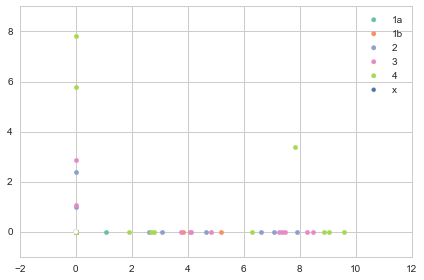

In [90]:
fig, ax = plt.subplots()

for cluster, df in macaulay2016_expression_log2.groupby(macaulay2016_clusters):
    print(cluster)
    color = cluster_to_color[cluster]
    ax.scatter(df['ENSDARG00000000001'], 
               df['ENSDARG00000000002'], color=color, label=cluster)
ax.legend()

In [95]:
smusher = FastICA(n_components=4, random_state=0)
macaulay2016_reduced = pd.DataFrame(smusher.fit_transform(macaulay2016_expression_log2), 
                                    index=macaulay2016_expression_log2.index)
macaulay2016_reduced.head()

,0,1,2,3
Well,,,,
DIM_1_A1,0.067605,-0.070037,-0.120694,0.110473
DIM_1_A10,0.073383,-0.023793,0.017519,-0.016700
DIM_1_A11,-0.019642,0.097276,-0.037474,0.171414
DIM_1_A12,0.043123,-0.027363,0.034019,0.068610
DIM_1_A2,0.075496,0.010411,0.073474,-0.048384


Add a column indicating the color

In [96]:
macaulay2016_reduced = macaulay2016_reduced.join(macaulay2016_clusters)
macaulay2016_reduced.head()

,0,1,2,3,cluster
Well,,,,,
DIM_1_A1,0.067605,-0.070037,-0.120694,0.110473,2
DIM_1_A10,0.073383,-0.023793,0.017519,-0.016700,3
DIM_1_A11,-0.019642,0.097276,-0.037474,0.171414,2
DIM_1_A12,0.043123,-0.027363,0.034019,0.068610,2
DIM_1_A2,0.075496,0.010411,0.073474,-0.048384,3


We can use `groupby` on the "cluster" column to plot one pair of axes:

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


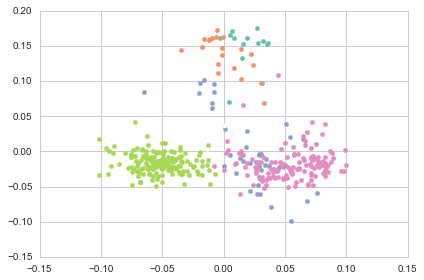

In [99]:
fig, ax = plt.subplots()
for cluster, df in macaulay2016_reduced.groupby('cluster'):
    color = cluster_to_color[cluster]
    ax.scatter(df[0], df[1], color=color, label=cluster)

Or we can use seaborn's `pairplot` to plot all the axes of the data:

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


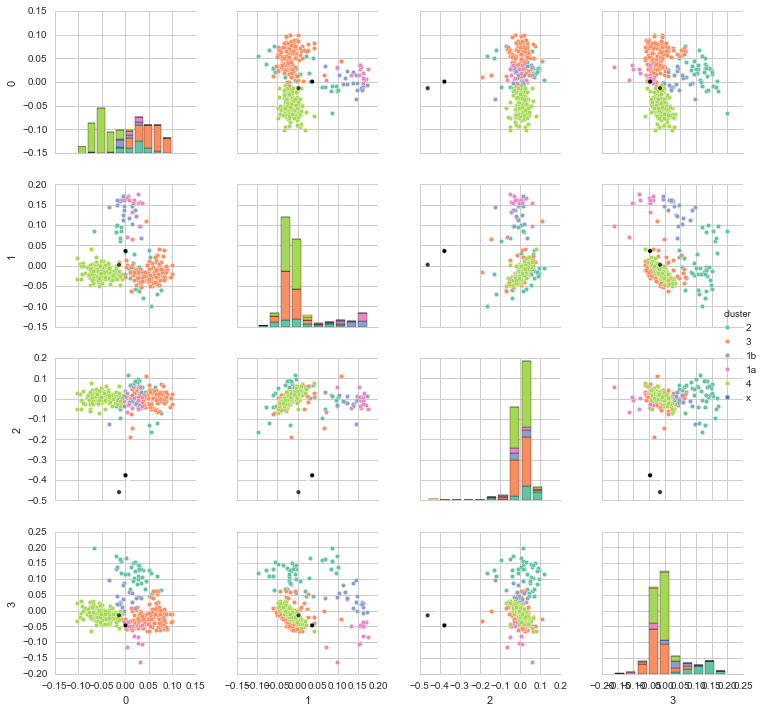

In [98]:
sns.pairplot(macaulay2016_reduced, hue='cluster', palette='Set2')

### Exercise 2
To do this exercise, you don't have to use the cells above, you can press "+" to add a cell and work in there instead.

1. Perform PCA and ICA on the Macaulay dataset, trying different numbers of components.
    1. Which component separates the outliers from the rest of the dataset? Does this change with the number of components? Why?
    2. 
2. Perform MDS and t-SNE on the Macaulay dataset, trying different numbers of components